In [1]:
import warnings, time, requests
warnings.filterwarnings('ignore') 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock 
import datetime
import seaborn as sns

In [3]:
titanic = pd.read_csv('data/titanic.csv')

In [4]:
p1 = titanic[titanic['Pclass']==1]['Age'].dropna()
p2 = titanic[titanic['Pclass']==2]['Age'].dropna()
p3 = titanic[titanic['Pclass']==3]['Age'].dropna()

In [5]:
from scipy import stats

stats.f_oneway(p1,p2,p3)
# 귀무가설 : 집단 간의 차이가 없다. (집단이 모두 동일한 집단이다.)
#대립가설: 집단 간의 차이가 있다.(집단 중 다른 집다이 하나 존재한다.)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [9]:
 # 정규성 검정 (shaporo  귀무: 정규성을 가진다. 대립 : 정규성을 가지지 않는다.)

print(stats.shapiro(p1))
print(stats.shapiro(p2))
print(stats.shapiro(p3))


ShapiroResult(statistic=0.9916939735412598, pvalue=0.3643055558204651)
ShapiroResult(statistic=0.9769523739814758, pvalue=0.005649181082844734)
ShapiroResult(statistic=0.9734365940093994, pvalue=4.183878445473965e-06)


In [8]:
# 비모수 검정  클러스터 != 모수 검정 아노바검정
stats.kruskal(p1,p2,p3)  

KruskalResult(statistic=95.99479230295296, pvalue=1.4288798296552103e-21)

In [10]:
# if 정규성 o, 독립성o, 등분산성 o =>Anoba 검정사용
# if 정규성 o, 독립성o, 등분산성 x => welch`s 검정사용 
# 하지만 welcj`s anova 검정도구는 stats에 없기 때문에 
# pingouin 라이브러리를 설치하여 사용이 가능하다.
stats.f_oneway(p1,p2,p3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [ ]:
## 수치형 독립변수와 종속변수 일때
# 상관분석, pearsonr 검정, 산점도
## 범주형 독립변수와 종속변수 일때
# 카이제곱 검정 ,countplot

## 범주형 독립변수와 수치형 종속변수 일때 연관성에 대해서 알아보는 함수 정리 
# 1. 범주형 변수의 클래스(범주)의 개수를 파악하여 2개인지 3개 이상인지 파악,barplot
# 2. 2개면  t-test( 평균을 비교 통계량이 2보다 크면 차이가 있다.), 3개면 anova(분산을 비교 )
# 3. 정규성 검정> 독립성 검정 > 등분산성 검정
# 4. 범주가 2개 &정규성o $등분산성o >> ttest_ind(equal_var = True)
#    범주가 2개 &정규성o $등분산성x >> ttest_ind(equal_var = False)
#    범주가 2개 &정규성x >> manwhitneyu test
#    범주가 3개 &정규성o % 등분산성o >> f_oneway (anova)
#    범주가 3개 &정규성o % 등분산성x >> welcj`s anova
#    범주가 3개 &정규성x >> kruskal

## 수치형 독립변수와 범주형 종속변수 일때 (연관성에 대해서 )
# 그래프(histogram, density)를 통해서 확인 > 집단별 그래프가 벌어질수록 차이가 있다. 
# 통계검정 X, 원인과 결과에 대한 가설이 아닐 경우엔 ttest or anova검정으로 확인할 수 있다. 

In [13]:
import statsmodels.api as sm


In [18]:
titanic2 = titanic.dropna(subset='Age',axis=0)
model = sm.Logit(titanic2['Survived'],titanic2[['Age','Pclass']].values)
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.645631
         Iterations 5
x1    1.238120e-01
x2    1.507215e-09
dtype: float64


In [19]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 May 2024   Pseudo R-squ.:                 0.04412
Time:                        10:36:42   Log-Likelihood:                -460.98
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 6.873e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0058      0.004      1.539      0.124      -0.002       0.013
x2            -0.3265      0.054     -6.044      0.000      -0.432      -0.221
==============================================================================
"""

2교시 실습

In [ ]:
# 한국복지패널 데이터


In [21]:
df = pd.read_stata('data/koweps_h18_2023_beta1.dta' )

In [22]:
df['h1801_4']

0       2
1       1
2       1
3       1
4       2
       ..
7649    1
7650    1
7651    1
7652    1
7653    1
Name: h1801_4, Length: 7654, dtype: int8

In [167]:
df = pd.read_csv('data/Koweps_hpwc14_2019.csv')
df

,gender,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6884 entries, 0 to 6883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         6878 non-null   float64
 1   birth          6878 non-null   float64
 2   marriage_type  6878 non-null   float64
 3   religion       6878 non-null   float64
 4   income         4534 non-null   float64
 5   code_job       6884 non-null   float64
 6   code_region    6878 non-null   float64
 7   Age            6878 non-null   float64
 8   job            6884 non-null   object 
dtypes: float64(8), object(1)
memory usage: 484.2+ KB


In [27]:
df[df['gender']==9]

,gender,birth,marriage_type,religion,income,code_job,code_region


In [65]:
df.isin([9,99,999,9999]).sum()

gender             0
birth              0
marriage_type      0
religion           0
income             3
code_job         155
code_region        0
Age                0
job                0
dtype: int64

In [66]:
df.describe()

,gender,birth,marriage_type,religion,income,code_job,code_region,Age
count,6878.000000,6878.000000,6878.000000,6878.000000,4534.000000,6884.000000,6878.000000,6878.000000
mean,1.476301,1966.705583,1.955656,1.544490,268.455007,587.435067,3.749927,53.294417
std,0.499474,16.272485,1.553069,0.498053,198.021206,264.291167,2.068335,16.272485
min,1.000000,1927.000000,0.000000,1.000000,0.000000,111.000000,1.000000,19.000000
25%,1.000000,1955.000000,1.000000,1.000000,150.000000,313.000000,2.000000,41.000000
50%,1.000000,1968.000000,1.000000,2.000000,220.000000,611.000000,3.000000,52.000000
75%,2.000000,1979.000000,2.000000,2.000000,345.750000,873.000000,6.000000,65.000000
max,2.000000,2001.000000,6.000000,2.000000,1892.000000,1009.000000,7.000000,93.000000


In [67]:
2019 - df['birth'] + 1

0       34.0
1       38.0
2       60.0
3       59.0
4       60.0
        ... 
6879    49.0
6880    34.0
6881    38.0
6882    27.0
6883    48.0
Name: birth, Length: 6884, dtype: float64

In [168]:
df['Age'] = 2019 - df['birth'] + 1

In [169]:
df['Age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: Age, dtype: float64

In [70]:
import matplotlib.pyplot as plt

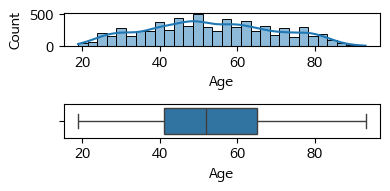

In [71]:
plt.figure(figsize=(4,2))
plt.subplot(2,1,1)
sns.histplot(df['Age'],kde =True)


plt.subplot(2,1,2)
sns.boxplot(data = df, x = 'Age')
plt.tight_layout()

## 수치형 히스토그램. 덴시티플랏 /박스플랏 

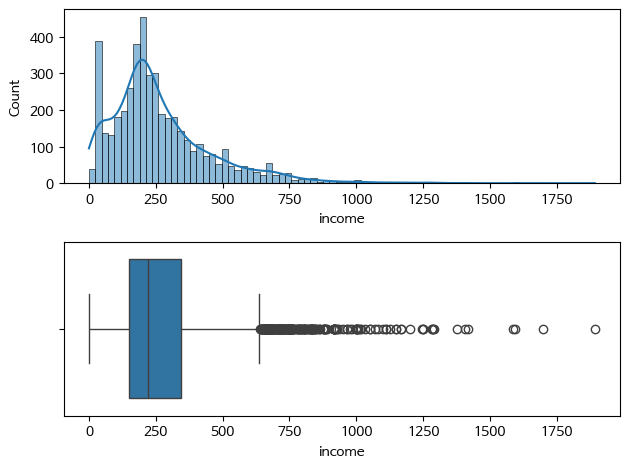

In [72]:

plt.subplot(2,1,1)
sns.histplot(df['income'],kde =True)


plt.subplot(2,1,2)
sns.boxplot(data = df, x = 'income')
plt.tight_layout()

In [73]:
# z-score 를 사용한 이상치 검출

z = ( df['income'] - df['income'].mean()) / df['income'].std()  # z-score 구하는 식  
df[abs(z) > 2]['income'].min()

665.0

In [74]:
df[abs(z) > 2]['income'].size  # 이상치가 몇명인지 확인 

239

In [75]:
df[abs(z) > 2]['income'].index # 이상치가 있는 행을 없애기위해 인덱스 검색 

Index([   4,    6,    8,   12,   14,   15,   19,   22,   23,   26,
       ...
       5007, 5013, 5037, 5045, 5047, 5373, 5399, 5549, 6867, 6869],
      dtype='int64', length=239)

In [76]:
df2 = df.drop(df[abs(z) > 2]['income'].index) # 이상치를 지운 값을 변수로 저장 

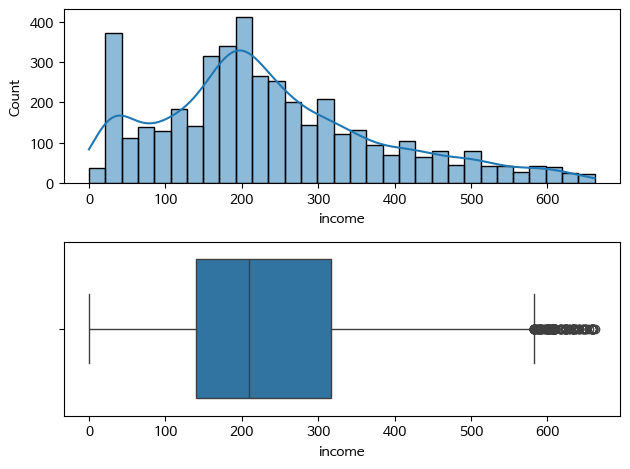

In [54]:
plt.subplot(2,1,1)
sns.histplot(df2['income'],kde =True)


plt.subplot(2,1,2)
sns.boxplot(data = df2, x = 'income')
plt.tight_layout()

In [56]:
df[df['income'] ==0]

,gender,birth,marriage_type,religion,income,code_job,code_region,Age
4715,2.0,1983.0,1.0,2.0,0.0,311.0,5.0,37.0
6347,2.0,1983.0,1.0,1.0,0.0,252.0,1.0,37.0
6632,2.0,1991.0,5.0,1.0,0.0,313.0,2.0,29.0
10487,2.0,1980.0,1.0,2.0,0.0,311.0,3.0,40.0
10620,2.0,1985.0,1.0,1.0,0.0,320.0,3.0,35.0
10818,2.0,1981.0,1.0,1.0,0.0,243.0,3.0,39.0
13654,2.0,1978.0,1.0,1.0,0.0,252.0,6.0,42.0


In [148]:
codejob= pd.read_csv('data/Koweps_code_job_2019.csv', encoding = 'euc-kr') # 합치는 방법 콩캣은 열이나 행 하나는 맞아야 함 여기서는 머지밖에 없음! 

In [149]:
codejob.head() # 같은 콜롬명 중복되는 값 찾기 

,code_job,job
0,111,의회 의원?고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고?홍보 관리자
4,131,연구?교육 및 법률 관련 관리자


In [173]:
df = df.merge(codejob, how='left')

In [174]:

df

,gender,birth,marriage_type,religion,income,code_job,code_region,Age,job
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0,75.0,NaN
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0,72.0,NaN
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,78.0,전기공
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,58.0,금속기계 부품 조립원
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0,57.0,NaN
...,...,...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0,53.0,NaN
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0,28.0,NaN
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0,25.0,건설 및 광업 단순 종사자
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0,22.0,보건 의료 관련 종사자


In [152]:
df[df['income']==0]

,gender,birth,marriage_type,religion,income,code_job,code_region,job,Age
495,2.0,1981.0,1.0,1.0,0.0,243.0,3.0,간호사,39.0
779,2.0,1983.0,1.0,1.0,0.0,252.0,1.0,학교 교사,37.0
831,2.0,1978.0,1.0,1.0,0.0,252.0,6.0,학교 교사,42.0
1201,2.0,1983.0,1.0,2.0,0.0,311.0,5.0,행정 사무원,37.0
1263,2.0,1980.0,1.0,2.0,0.0,311.0,3.0,행정 사무원,40.0
1682,2.0,1991.0,5.0,1.0,0.0,313.0,2.0,회계 및 경리 사무원,29.0
1916,2.0,1985.0,1.0,1.0,0.0,320.0,3.0,금융 사무 종사자,35.0


In [153]:
# 범주형 데이터 처리 
df.columns

Index(['gender', 'birth', 'marriage_type', 'religion', 'income', 'code_job',
       'code_region', 'job', 'Age'],
      dtype='object')

In [154]:
df['gender'].value_counts() # 성별 값 구하기 

gender
1.0    3602
2.0    3276
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

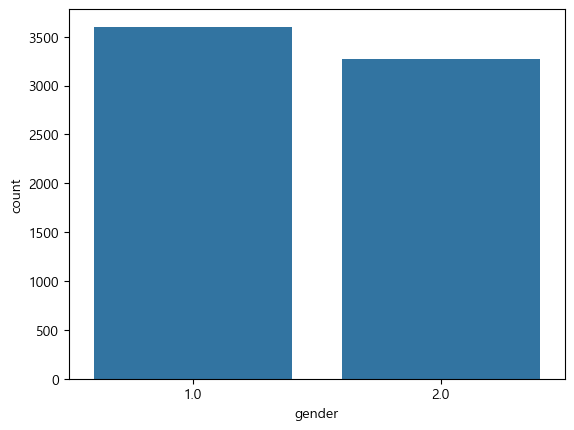

In [155]:
sns.countplot(data = df, x ='gender') # 2가 여성 

In [156]:
df['marriage_type'].value_counts()  # 혼인상태 확인

marriage_type
1.0    4598
5.0    1263
2.0     558
3.0     404
4.0      51
0.0       3
6.0       1
Name: count, dtype: int64

In [157]:
m_cnt = df['marriage_type'].value_counts()  / df.shape[0] # 데이터 전체로 나눈다 . 메리지 타입 size로 해도 됨  비율그래프로 만들기 위해 비율 구하기 

In [158]:
m_cnt

marriage_type
1.0    0.667926
5.0    0.183469
2.0    0.081058
3.0    0.058687
4.0    0.007408
0.0    0.000436
6.0    0.000145
Name: count, dtype: float64

In [159]:
from matplotlib import font_manager, rc 
font = 'C:/Windows/Fonts/Malgun.ttf'   # <, 맑은 고딕 체 
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)


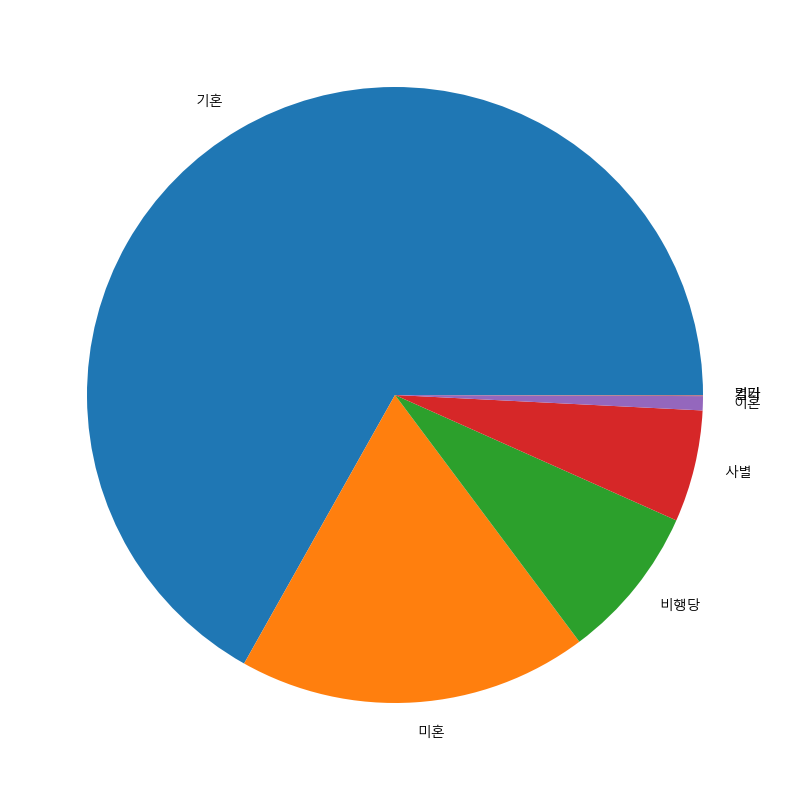

In [160]:
plt.figure(figsize=(10,10))
plt.pie(m_cnt, labels=['기혼', '미혼', '비행당', '사별', '이혼', '별거', '기타'])
plt.show()   # 비율로서 절반이 기혼이라는 것을 확인 가능 

In [161]:
df

,gender,birth,marriage_type,religion,income,code_job,code_region,job,Age
0,1.0,1986.0,1.0,2.0,290.0,111.0,2.0,의회 의원?고위 공무원 및 공공단체 임원,34.0
1,1.0,1982.0,1.0,2.0,608.0,111.0,2.0,의회 의원?고위 공무원 및 공공단체 임원,38.0
2,1.0,1960.0,1.0,2.0,314.0,111.0,7.0,의회 의원?고위 공무원 및 공공단체 임원,60.0
3,2.0,1961.0,1.0,2.0,NaN,111.0,7.0,의회 의원?고위 공무원 및 공공단체 임원,59.0
4,1.0,1960.0,1.0,1.0,1110.0,111.0,1.0,의회 의원?고위 공무원 및 공공단체 임원,60.0
...,...,...,...,...,...,...,...,...,...
6879,1.0,1971.0,1.0,2.0,604.0,1002.0,3.0,부사관,49.0
6880,1.0,1986.0,1.0,1.0,477.0,1002.0,6.0,부사관,34.0
6881,1.0,1982.0,1.0,1.0,479.0,1002.0,6.0,부사관,38.0
6882,1.0,1993.0,3.0,2.0,308.0,1009.0,2.0,기타 군인,27.0


In [162]:
df['religion'].value_counts()  # 2 무교 1 유교  >> 범주형 

religion
2.0    3745
1.0    3133
Name: count, dtype: int64

In [163]:
df['job'].value_counts() #  Length: 156, 총 직업의 수 

job
작물 재배 종사자           962
청소원 및 환경미화원         391
매장 판매 종사자           354
경영 관련 사무원           275
자동차 운전원             236
                   ... 
항공기?선박 기관사 및 관제사      1
혼례 및 장례 종사자           1
행정 전문가                1
선박 승무원 및 관련 종사자       1
철도 및 전동차 기관사          1
Name: count, Length: 156, dtype: int64

In [164]:
df['code_region'].value_counts()

code_region
2.0    1548
7.0    1191
3.0    1116
1.0     978
4.0     776
5.0     685
6.0     584
Name: count, dtype: int64

         특이사항
gender : x
birth : age로 변환. 사용할 일 x
marriage_type : 기혼vs 미혼( + 기타)
religion : x
income : 누락값 존재, 이상치 존재 , 0 이라는 수치 처리방법 필요 
code_job : job으로 바꿈, 사용할 일x
code_region	: 수도권 vs 비수도권
job : 152 직업, 누락값, 자체만으로는 사용하기가 어렵다
Age : 누락값 x ,이상치 x = x 

성별에 따른 임금 차이가 날까?(남년임금이 다를까?)

나이에 따라 임금 차이가 날까? (임금이 가장 높은 나이가 언제일까?)

나이에 따라 임금차이가 날까? (어느 나이대가 임금이 높을까?)

성별과연령대에 따라 임금 차이가 날까?(남녀 임금의 차이가 연령대에 따라 차이가 있을까?)

지역에 따라 임금 차이가 날까? (수도권이 비수도권보다 임금이 높을까?)

남여에 따라 선호 직업에 차이가 날까?(남녀별로 어떤 직업이 선호도가 높을까?)

종교 유무에 따른 이혼율의 차이가 날까?(종교가 있으면 가정사에 문제가 있을까?)

지역에 따라 나이가 차이가 날까? ()

In [188]:
df['Age']

0        75.0
1        72.0
2        78.0
3        58.0
4        57.0
         ... 
14413    53.0
14414    28.0
14415    25.0
14416    22.0
14417    19.0
Name: Age, Length: 14418, dtype: float64

In [ ]:
# 성별에 따른 임금 차이가 날까?(남년임금이 다를까?)
# 독립변수 : 성별(범주), 종속변수: 임금(수치)
# income : 누락값 존재, 이상치 존재 , 0 이라는 수치 처리방법 필요 

<Axes: xlabel='gender', ylabel='income'>

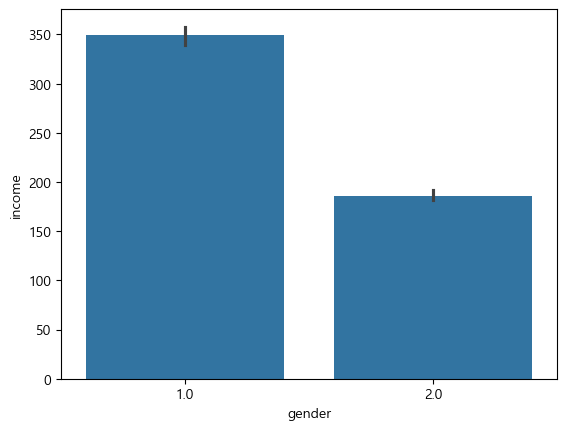

In [190]:
sns.barplot(data = df, x = 'gender', y = 'income')  # 1이 남자 

# == 임금차이가 나고있다는 것을 확인 할 수 있다. 

In [205]:
# 이상치를 제거

Q1 = df['income'].quantile(q=0.25)
Q3 = df['income'].quantile(q=0.75)
IQR = Q3 - Q1
high = Q3 + 1.5 * IQR
df2 = df[df['income'] < high]

In [209]:
high = Q3 + 1.5 * IQR
high

639.375

<Axes: xlabel='gender', ylabel='income'>

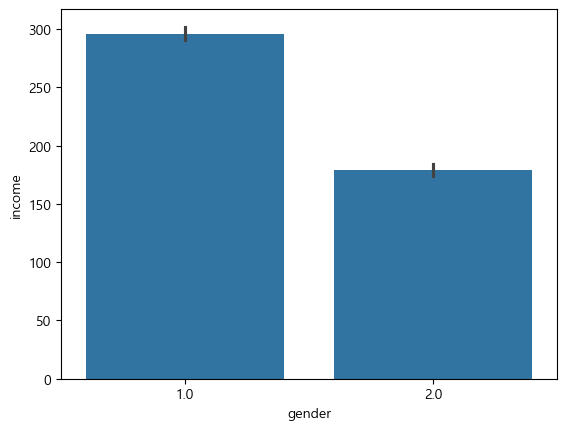

In [207]:
sns.barplot(data = df2, x = 'gender', y = 'income')

In [216]:
df2

,gender,birth,marriage_type,religion,income,code_job,code_region,job,Age
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공,78.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원,58.0
7,2.0,1934.0,1.0,1.0,27.0,941.0,1.0,청소원 및 환경미화원,86.0
8,2.0,1940.0,2.0,1.0,27.0,999.0,2.0,기타 서비스 관련 단순 종사자,80.0
14,1.0,1978.0,1.0,2.0,338.0,312.0,1.0,경영 관련 사무원,42.0
...,...,...,...,...,...,...,...,...,...
14401,1.0,1966.0,1.0,1.0,280.0,874.0,6.0,물품 이동 장비 조작원,54.0
14402,2.0,1962.0,1.0,1.0,209.0,930.0,6.0,제조 관련 단순 종사자,58.0
14405,2.0,1947.0,2.0,2.0,27.0,941.0,6.0,청소원 및 환경미화원,73.0
14410,1.0,1956.0,1.0,1.0,200.0,854.0,6.0,운송차량 및 기계 관련 조립원,64.0


<Axes: xlabel='Age', ylabel='income'>

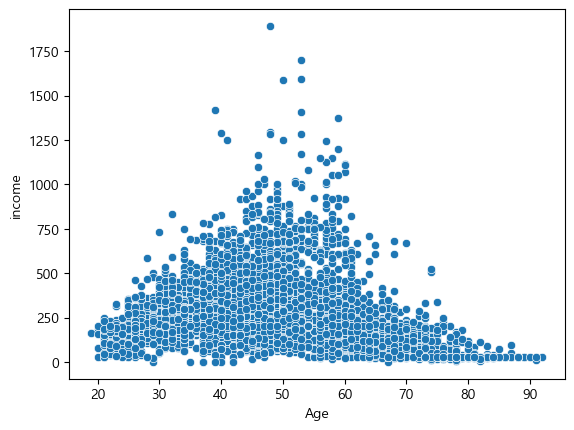

In [217]:
# 나이에 따라 임금 차이가 날까? (임금이 가장 높은 나이가 언제일까?)
# 독립변수 : 나이 (수치), 종속변수 : 임금(수치)
#  나이 :수입이 있는 나이 구간을 대상으로 해야 공평하지 않나?

sns.scatterplot(data = df, x ='Age', y = 'income')

In [219]:
df2 = df.dropna(subset = 'income', axis= 0 )
stats.pearsonr(df2['Age'],df2['income'])

# PearsonRResult(statistic=-0.21951593061416613, << 연관성이 없다. -이므로 음의 상관관계 
#                pvalue=1.3433206200931525e-50) << 매우작음 이 관계가 통계적으로 유의미 함을 나타냄 
# == 통계적으로 유의한 수준에서 두 변수 간에 음의 선형 관계가 있는것으로 판단할 수 있음 

PearsonRResult(statistic=-0.21951593061416613, pvalue=1.3433206200931525e-50)

In [220]:
df3 = df2[(df2['Age'] > 30) & (df2['Age'] < 60)]

In [223]:
df3.shape

(2848, 9)

<Axes: xlabel='Age', ylabel='income'>

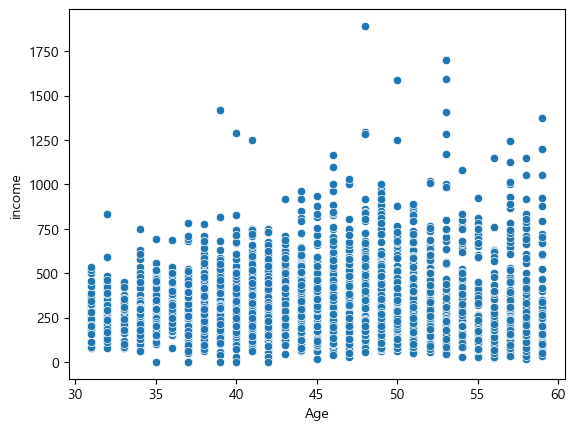

In [224]:
sns.scatterplot(data = df3, x ='Age', y = 'income')

In [213]:
# 나이에 따라 임금차이가 날까? (어느 나이대가 임금이 높을까?)
# 독립변수 : 연령대 (수치), 종속변수 : 임금(수치)

In [251]:
def convert_age(age):
    if age < 20:
        return '청소년'
    elif age < 30:
         return '20대'
    elif age < 40:
         return '30대'
    elif age < 50:
         return '40대'
    elif age < 60:
         return '50대'
    else:
        return'60대 이상'

In [252]:
# 누락값을 제거한 df2에 적용 
df2['age_group'] = df2['Age'].apply(convert_age) 

In [253]:
df2

,gender,birth,marriage_type,religion,income,code_job,code_region,job,Age,age_group,age_group2
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공,78.0,60대 이상,기타
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원,58.0,50대,리더
7,2.0,1934.0,1.0,1.0,27.0,941.0,1.0,청소원 및 환경미화원,86.0,60대 이상,기타
8,2.0,1940.0,2.0,1.0,27.0,999.0,2.0,기타 서비스 관련 단순 종사자,80.0,60대 이상,기타
14,1.0,1978.0,1.0,2.0,338.0,312.0,1.0,경영 관련 사무원,42.0,40대,시니어
...,...,...,...,...,...,...,...,...,...,...,...
14401,1.0,1966.0,1.0,1.0,280.0,874.0,6.0,물품 이동 장비 조작원,54.0,50대,리더
14402,2.0,1962.0,1.0,1.0,209.0,930.0,6.0,제조 관련 단순 종사자,58.0,50대,리더
14405,2.0,1947.0,2.0,2.0,27.0,941.0,6.0,청소원 및 환경미화원,73.0,60대 이상,기타
14410,1.0,1956.0,1.0,1.0,200.0,854.0,6.0,운송차량 및 기계 관련 조립원,64.0,60대 이상,기타


In [254]:
df2['age_group'].value_counts() # 연령대가 4개의 범주로 

age_group
40대       1164
60대 이상    1093
50대        955
30대        808
20대        513
청소년          1
Name: count, dtype: int64

<Axes: xlabel='age_group', ylabel='income'>

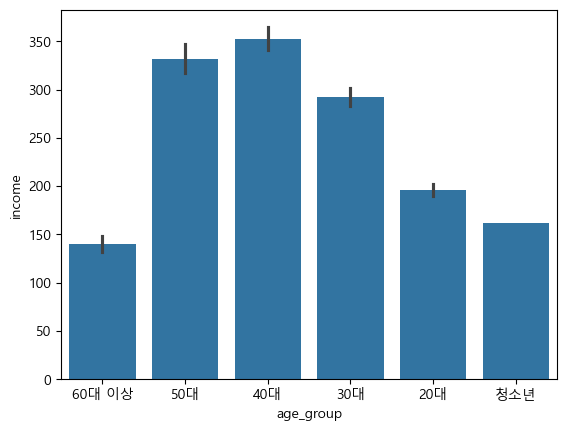

In [255]:
sns.barplot(data = df2, x = 'age_group', y = 'income')

In [256]:
a40 = df2[df2['age_group']=='40대']['income']
a50 = df2[df2['age_group']=='50대']['income']

In [257]:
print(stats.shapiro(a40))
print(stats.shapiro(a50))

ShapiroResult(statistic=0.9164077043533325, pvalue=7.728013735201356e-25)
ShapiroResult(statistic=0.8526034355163574, pvalue=6.356788170873918e-29)


<Axes: xlabel='income', ylabel='Density'>

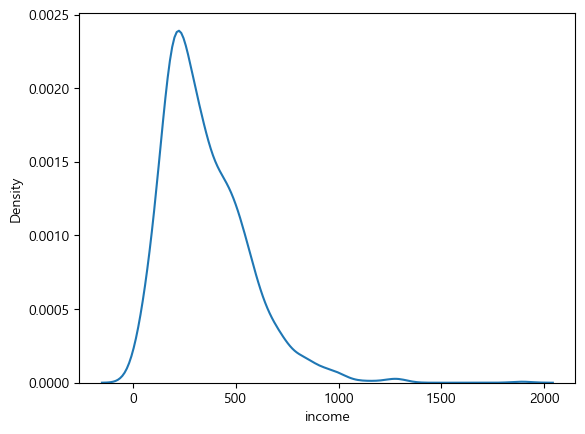

In [258]:
sns.kdeplot(a40)  # 한쪽으로 쏠려있는 모양 = 정규성 없다. 

In [259]:
stats.mannwhitneyu(a40,a50)  #결과값 =  두 집단이 차이가 있다! 
 # Mann-Whitney U 검정 통계량(statistic)이 큰 값일수록 두 표본 간에 큰 차이가 있음

MannwhitneyuResult(statistic=623783.0, pvalue=1.2312781606968281e-06)

<Axes: xlabel='age_group', ylabel='income'>

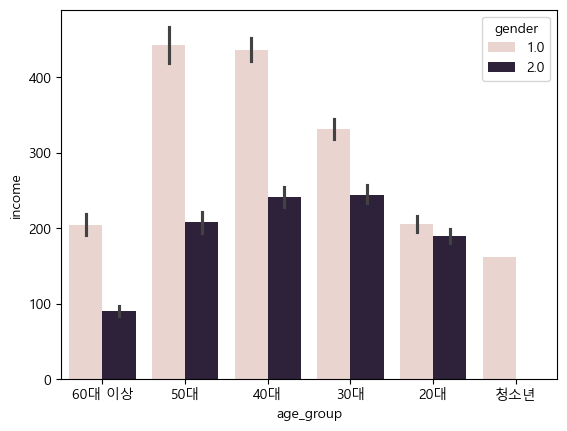

In [260]:
# 성별과 연령대에 따라 임금 차이가 날까?(남녀 임금의 차이가 연령대에 따라 차이가 있을까?)
sns.barplot(data = df2, x ='age_group'  ,y = 'income' ,hue ='gender')

In [261]:
m20 = df2[(df2['age_group'] == '20대') & (df2['gender'] == 1) ]['income']
f20 = df2[(df2['age_group'] == '20대') & (df2['gender'] == 2) ]['income']

In [262]:
print(stats.shapiro(m20))
print(stats.shapiro(f20)) # 정규성 x  비모수 검정으로 맨 위트니 !

ShapiroResult(statistic=0.9695075154304504, pvalue=0.00026639067800715566)
ShapiroResult(statistic=0.9572811722755432, pvalue=5.857938845110766e-08)


In [263]:
stats.mannwhitneyu(m20,f20) # 모든 연령대에서 남성의 임금이 여성의 임금보다 높다 :대립가설 

MannwhitneyuResult(statistic=34950.0, pvalue=0.021252720498541065)

In [264]:
stats.ttest_ind(m20,f20)

TtestResult(statistic=2.136690590348042, pvalue=0.03309745763585884, df=511.0)

In [265]:
def convert_age(age):
    if age < 28:
        return '학생'
    elif age < 36:
         return '주니어'
    elif age < 46:
         return '시니어'
    elif age < 60:
         return '리더'
    else:
        return '기타'

df2['age_group2'] = df2['Age'].apply(convert_age)

In [266]:
df2

,gender,birth,marriage_type,religion,income,code_job,code_region,job,Age,age_group,age_group2
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0,전기공,78.0,60대 이상,기타
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0,금속기계 부품 조립원,58.0,50대,리더
7,2.0,1934.0,1.0,1.0,27.0,941.0,1.0,청소원 및 환경미화원,86.0,60대 이상,기타
8,2.0,1940.0,2.0,1.0,27.0,999.0,2.0,기타 서비스 관련 단순 종사자,80.0,60대 이상,기타
14,1.0,1978.0,1.0,2.0,338.0,312.0,1.0,경영 관련 사무원,42.0,40대,시니어
...,...,...,...,...,...,...,...,...,...,...,...
14401,1.0,1966.0,1.0,1.0,280.0,874.0,6.0,물품 이동 장비 조작원,54.0,50대,리더
14402,2.0,1962.0,1.0,1.0,209.0,930.0,6.0,제조 관련 단순 종사자,58.0,50대,리더
14405,2.0,1947.0,2.0,2.0,27.0,941.0,6.0,청소원 및 환경미화원,73.0,60대 이상,기타
14410,1.0,1956.0,1.0,1.0,200.0,854.0,6.0,운송차량 및 기계 관련 조립원,64.0,60대 이상,기타


In [267]:
df2['age_group2'].value_counts()

age_group2
리더     1468
기타     1093
시니어     997
주니어     625
학생      351
Name: count, dtype: int64

<Axes: xlabel='age_group2', ylabel='income'>

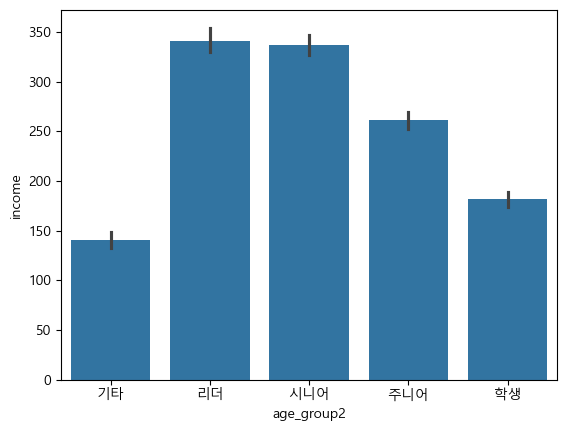

In [268]:
sns.barplot(data= df2, x = 'age_group2', y = 'income')

In [269]:
senier = df2[df2['age_group2'] == '시니어']['income'] 
leader = df2[df2['age_group2'] == '리더']['income'] 

In [271]:
print(stats.shapiro(senier))
print(stats.shapiro(leader)) 


ShapiroResult(statistic=0.9455574154853821, pvalue=1.073646107098409e-18)
ShapiroResult(statistic=0.866097092628479, pvalue=1.1758889679492784e-33)


In [270]:
stats.mannwhitneyu(senier,leader)

MannwhitneyuResult(statistic=789252.5, pvalue=0.0009231668451082827)

In [273]:
df2.groupby('Age')['income'].mean()

Age
19.0    162.000000
20.0    121.333333
21.0    136.400000
22.0    123.666667
23.0    179.676471
           ...    
88.0     27.000000
89.0     27.000000
90.0     27.000000
91.0     20.000000
92.0     27.000000
Name: income, Length: 74, dtype: float64

<Axes: xlabel='Age', ylabel='income'>

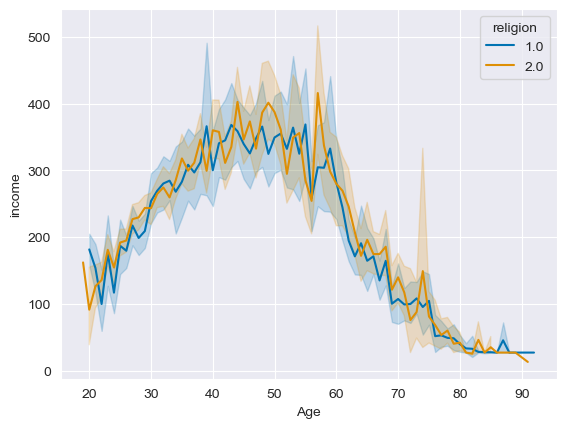

In [285]:
sns.set_style('darkgrid')
sns.lineplot(data = df2 , x = 'Age', y ='income', hue ='religion', palette='colorblind')